# Objective: 

Get an overview of local spending in Portugal 

Imports: 

In [20]:
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline 

Quick function for getting data from different years: 

In [21]:
def get_year(year): 
    receita = pd.read_csv('data/AIIRM'+str(year)+'.csv', sep=';')
    despesa = pd.read_csv('data/AIIIDM'+str(year)+'.csv', sep=';')
    
    return receita, despesa 

Start with a quick exercise of examining 2014: 

In [22]:
receita, despesa = get_year(2014)

Use with per_year data (instead of per quarter): 

In [23]:
receita = receita[receita['CODIGO_PERIODO'] == 'A']
despesa = despesa[despesa['CODIGO_PERIODO'] == 'A']

Make the index the Autarquia: 

In [24]:
receita.set_index('DSC_AUTARQUIA', inplace=True)
despesa.set_index('DSC_AUTARQUIA', inplace=True)

Store the column names from each dataframe (so we know what came from where after we merge them): 

In [25]:
items_despesa = list(despesa.columns)
items_receita = list(receita.columns)

In [26]:
items_despesa.remove('DESPESA_TOTAL')

In [27]:
items_receita

['IMI',
 'TAXAS_MULTAS_OUTROS_IMPOSTOS',
 'FINANCIAMENTO_UNIAO_EUROPEIA',
 'IMPOSTOS_MUNICIPAIS',
 'IUC',
 'TRANSFERENCIAS_ORCAMENTO_ESTADO',
 'ldk',
 'IMT',
 'CODIGO_PERIODO',
 'CODIGOINE',
 'VENDA_BENS_SERVICOS',
 'DERRAMA_IRC',
 'RECEITAS_TOTAIS',
 'OUTRAS_RECEITAS']

In [28]:
items_receita.remove('RECEITAS_TOTAIS')

Get rid of some codes: 

In [29]:
for info_list in [items_receita, items_despesa]:
    info_list.remove('ldk')
    info_list.remove('CODIGOINE')

    info_list.remove('CODIGO_PERIODO')

We have a column that contains only missing data, so we'll remove that: 

In [52]:
items_despesa.remove('NVESTIMENTOS_OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL')

What information do we have on Receita? 

In [30]:
items_receita

['IMI',
 'TAXAS_MULTAS_OUTROS_IMPOSTOS',
 'FINANCIAMENTO_UNIAO_EUROPEIA',
 'IMPOSTOS_MUNICIPAIS',
 'IUC',
 'TRANSFERENCIAS_ORCAMENTO_ESTADO',
 'IMT',
 'VENDA_BENS_SERVICOS',
 'DERRAMA_IRC',
 'OUTRAS_RECEITAS']

And on Despesa?

In [31]:
items_despesa

['NVESTIMENTOS_OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL',
 'DESPESA_AQUISICAO_BENS',
 'TERRENOS_HABITACOES',
 'INFRAESTRUTURAS_BASICAS',
 'ACESSIBILIDADES',
 'JUROS_ENCARGOS',
 'DESPESA_COM_PESSOAL',
 'EDIFICIOS',
 'DESPESA_CORRENTE',
 'TRANSFERENCIAS_OUTRAS_DESPESAS_CAPITAL',
 'TRANSFERENCIAS_CORRENTES',
 'OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL']

Merge on index: 

In [32]:
data = pd.merge(receita, despesa, left_index=True, right_index=True)

Get the difference between Despesa Total and Receita Total

In [152]:
data['profit'] = data.RECEITAS_TOTAIS - data.DESPESA_TOTAL

Create a function for displaying the top_x and bottom_x, optionally normalizing 

In [148]:
def display(df, feature, bottom=False, x=5, normalized=False, normalizer='RECEITAS_TOTAIS'):
    
    if normalized: 
        series = df[feature] / df[normalizer]
    else:
        series = df[feature]
        
    series.sort_values(ascending=bottom).head(x).plot(kind='barh', figsize=(4,2))
    plt.show()

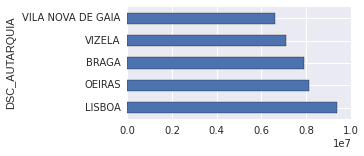

In [151]:
display(data, 'EDIFICIOS')

What does the distribution of profits look like? 

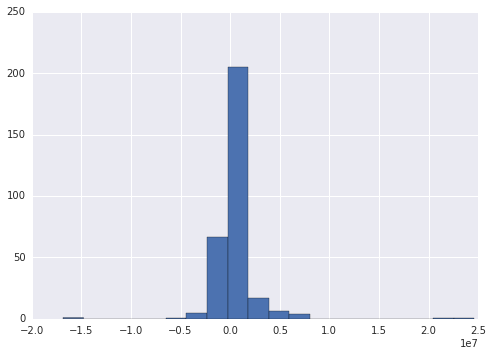

In [92]:
data.profit.hist(bins=20)

What autarquias have the biggest profit? 

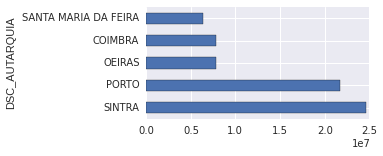

In [93]:
top_x(data, 'profit')

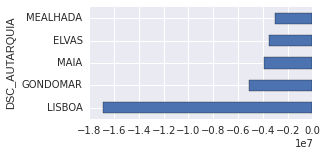

In [94]:
bottom_x(data, 'profit')

So the biggest profit maker is Sintra, and the largest loss maker seems to be Lisbon. 

Where do Sintra's profits come from?

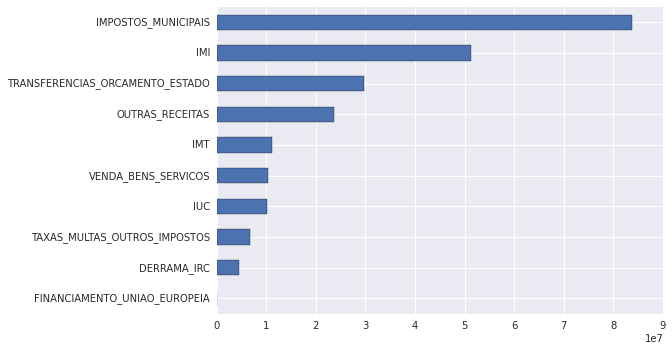

In [154]:
data.loc['SINTRA'][items_receita].sort_values().plot(kind='barh')

Let's take a look at Lisbon. What is the expense made of? 

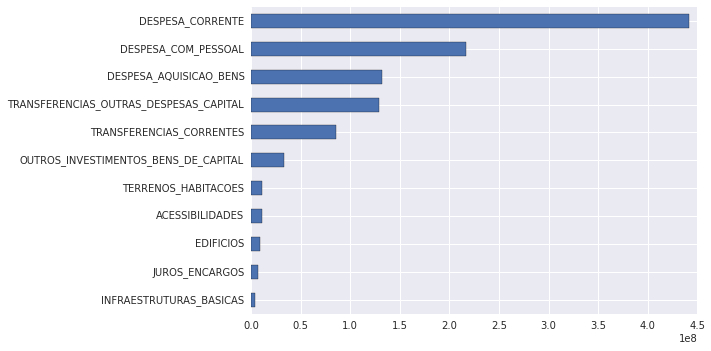

In [95]:
data.loc['LISBOA'][items_despesa].sort_values().plot(kind='barh')

And the income? 

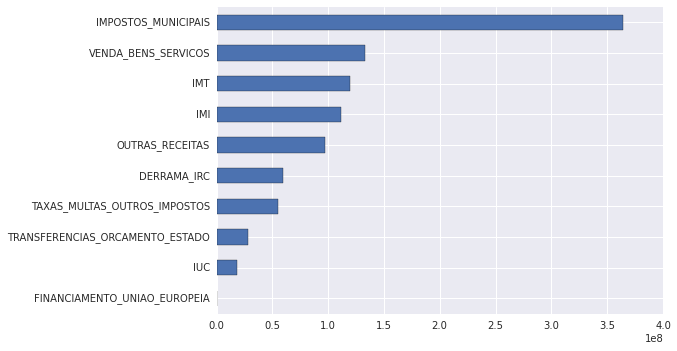

In [96]:
data.loc['LISBOA'][items_receita].sort_values().plot(kind='barh')

What about EU money, how is that distributed? 

In [97]:
print 'Total EU financing for Municipalities in 2014 was %0.0fM €' % (data.FINANCIAMENTO_UNIAO_EUROPEIA.sum()/1e6)

Total EU financing for Municipalities in 2014 was 366M €


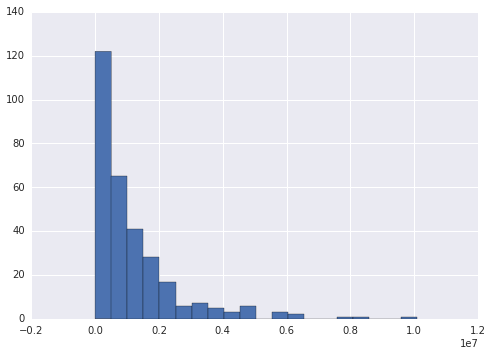

In [98]:
data.FINANCIAMENTO_UNIAO_EUROPEIA.hist(bins=20)

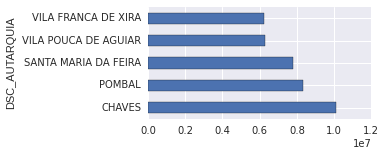

In [99]:
top_x(data, 'FINANCIAMENTO_UNIAO_EUROPEIA')

An interesting question would be how these are distributed per capita, and with expenditure. 

How much did the top receiver (CHAVES) get?

In [100]:
print 'and CHAVES gets... %0.0fM €' % (data.FINANCIAMENTO_UNIAO_EUROPEIA.loc['CHAVES']/1e6)

and CHAVES gets... 10M €


And the ones at the bottom? 

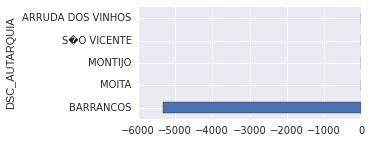

In [101]:
bottom_x(data, 'FINANCIAMENTO_UNIAO_EUROPEIA')

Well... that is surreal. 

Who were the top 3 spenders in each individual category? 

In [102]:
items_despesa

['DESPESA_AQUISICAO_BENS',
 'TERRENOS_HABITACOES',
 'INFRAESTRUTURAS_BASICAS',
 'ACESSIBILIDADES',
 'JUROS_ENCARGOS',
 'DESPESA_COM_PESSOAL',
 'EDIFICIOS',
 'DESPESA_CORRENTE',
 'TRANSFERENCIAS_OUTRAS_DESPESAS_CAPITAL',
 'TRANSFERENCIAS_CORRENTES',
 'OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL']

DESPESA_AQUISICAO_BENS


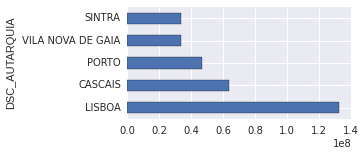

TERRENOS_HABITACOES


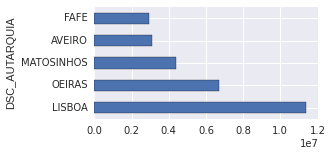

INFRAESTRUTURAS_BASICAS


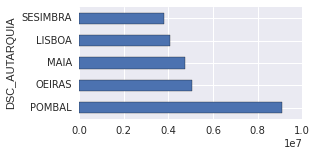

ACESSIBILIDADES


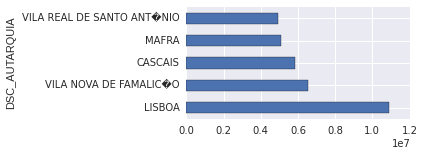

JUROS_ENCARGOS


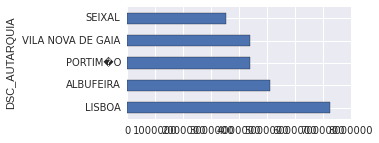

DESPESA_COM_PESSOAL


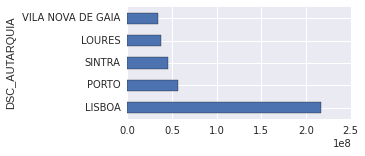

EDIFICIOS


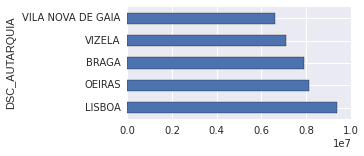

DESPESA_CORRENTE


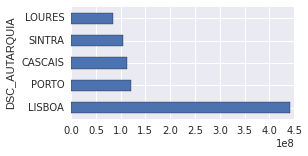

TRANSFERENCIAS_OUTRAS_DESPESAS_CAPITAL


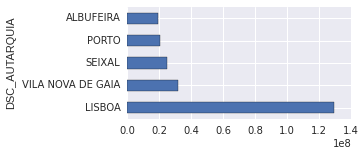

TRANSFERENCIAS_CORRENTES


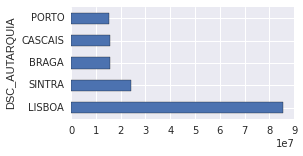

OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL


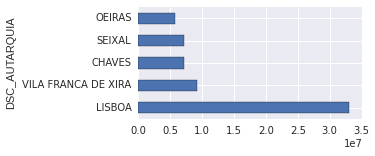

In [103]:
for item in items_despesa:
    print item
    top_x(data, item)

So generally Lisboa is top on every category. One exception: Pombal on basic infrastructure. 

What if we think of expenses in precentage of income?

In [114]:
data.applymap?

In [122]:
data['RECEITAS_TOTAIS'].sort_values().head()

DSC_AUTARQUIA
CORVO                    1996330.11
BARRANCOS                3522046.33
S�O ROQUE DO PICO        4027477.84
SANTA CRUZ DAS FLORES    4108748.68
ALVITO                   4240368.35
Name: RECEITAS_TOTAIS, dtype: float64

In [127]:
normal = data['EDIFICIOS'] / data['RECEITAS_TOTAIS']

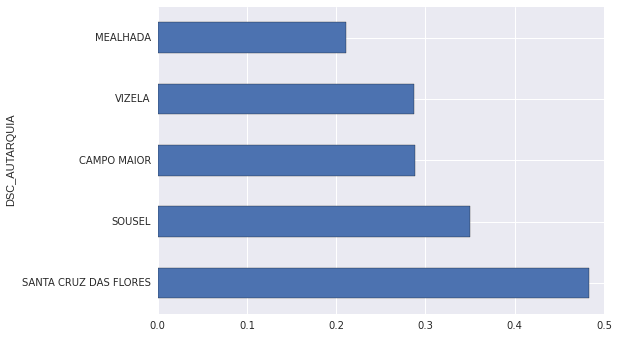

In [137]:
normal.sort_values(ascending=False).head().plot(kind='barh')

In [156]:
feature = 'EDIFICIOS'

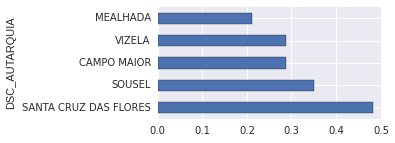


----------DESPESA_AQUISICAO_BENS---------


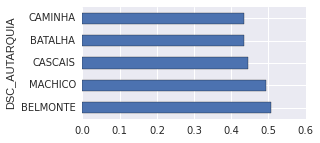


----------TERRENOS_HABITACOES---------


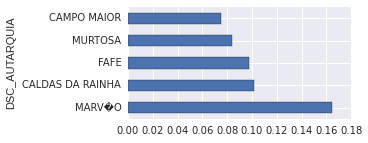


----------INFRAESTRUTURAS_BASICAS---------


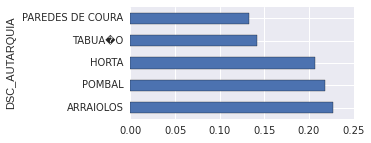


----------ACESSIBILIDADES---------


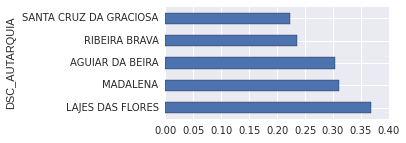


----------JUROS_ENCARGOS---------


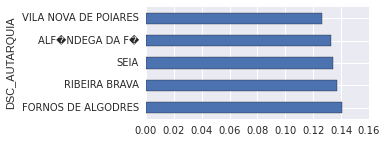


----------DESPESA_COM_PESSOAL---------


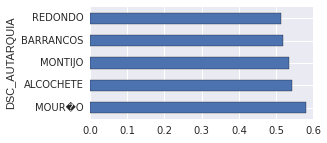


----------EDIFICIOS---------


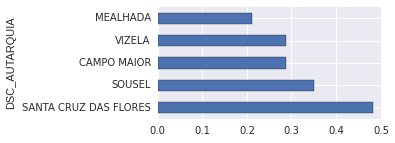


----------DESPESA_CORRENTE---------


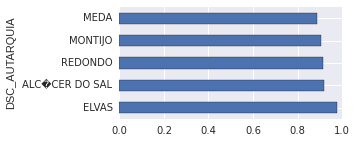


----------TRANSFERENCIAS_OUTRAS_DESPESAS_CAPITAL---------


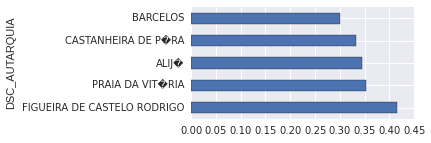


----------TRANSFERENCIAS_CORRENTES---------


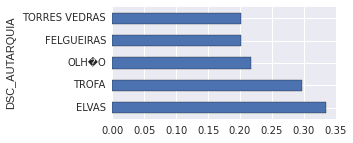


----------OUTROS_INVESTIMENTOS_BENS_DE_CAPITAL---------


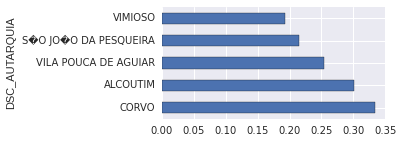

In [161]:
for item in items_despesa:
    print '\n----------%s---------' % item
    display(data, item, bottom=False, x=5, normalized=True, normalizer='RECEITAS_TOTAIS')


----------IMI---------


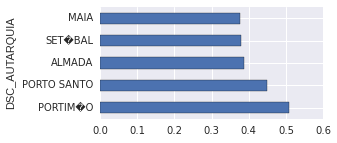


----------TAXAS_MULTAS_OUTROS_IMPOSTOS---------


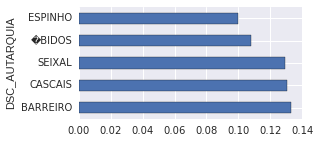


----------FINANCIAMENTO_UNIAO_EUROPEIA---------


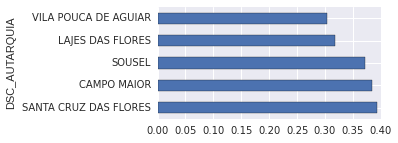


----------IMPOSTOS_MUNICIPAIS---------


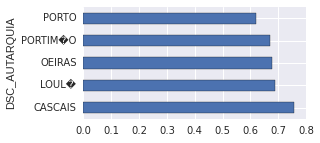


----------IUC---------


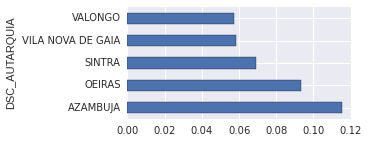


----------TRANSFERENCIAS_ORCAMENTO_ESTADO---------


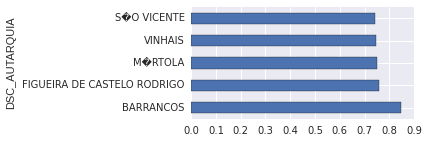


----------IMT---------


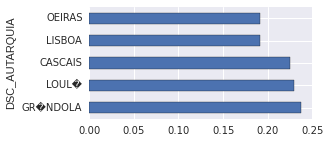


----------VENDA_BENS_SERVICOS---------


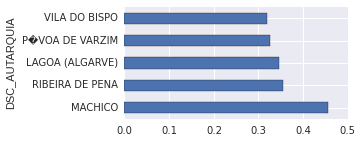


----------DERRAMA_IRC---------


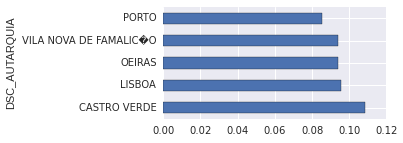


----------OUTRAS_RECEITAS---------


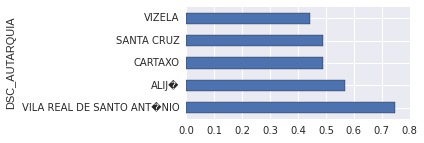

In [163]:
for item in items_receita:
    print '\n----------%s---------' % item
    display(data, item, bottom=False, x=5, normalized=True, normalizer='RECEITAS_TOTAIS')